In [2]:
import os
from pygazeanalyser.gazeplotterMUI import draw_fixations, draw_heatmap, draw_scanpath, draw_raw
import numpy as np
import pandas as pd 
import cv2
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
completeDataScan = []
for x in range(20):
    data = pd.read_csv("200CSV/"+str(x)+"_scanpath_data.csv")
    scData = list(data.iloc[:,:6].values)
    scData = [list(x) for x in scData]
    completeDataScan+=scData

clusters = {}
width = 1440
height = 900
thres = 0.2*width


<class 'numpy.ndarray'>


c:\users\hp\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Keyboard'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


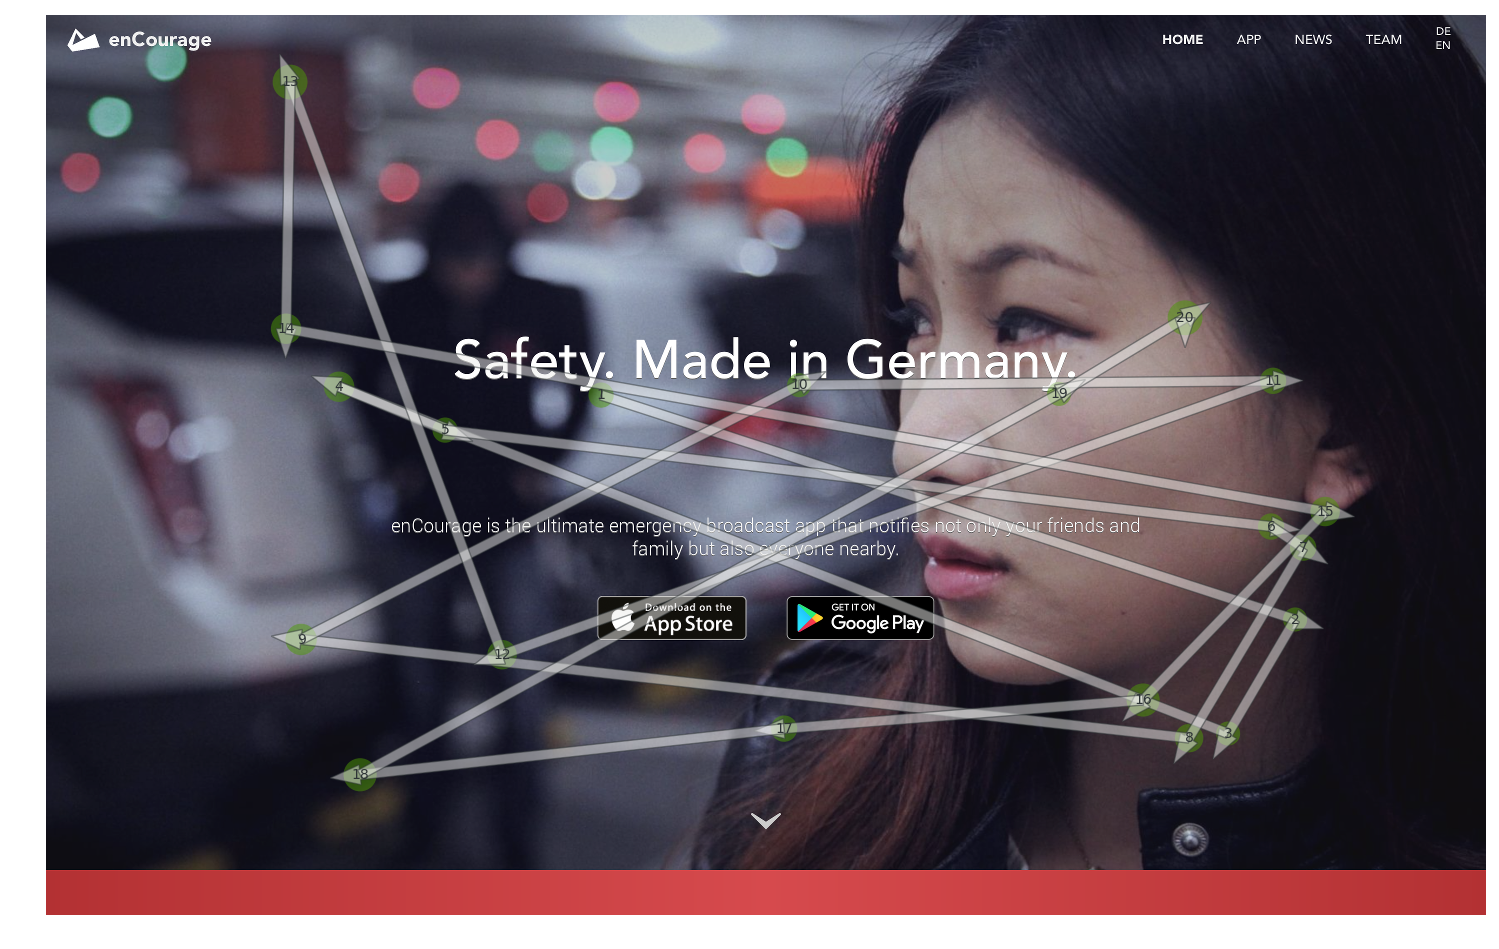

In [7]:
for point in completeDataScan:
    cost = point[0]+1
    durr = point[3]
    x = point[4]
    y = point[5]

    if len(clusters)==0:
        clusters[(x,y)] = [cost,durr,1]
    else:
        for (xc,yc) in clusters.keys():
            dist = ((x-xc)**2 +(y-yc)**2)**0.5
            dist = dist*2 if clusters[(xc,yc)][-1]>1 else dist
            if dist<=thres:
                clust = clusters[(xc,yc)]
                nop = clust[2]+1
                cost = (clust[0]*(nop-1) + cost)//nop
                durr = (clust[1]*(nop-1) + durr)//nop
                meanX = (xc*(nop-1) + x)//nop
                meanY = (yc*(nop-1) + y)/nop
                clusters.pop((xc,yc))
                clusters[(meanX,meanY)] = [cost,durr,nop]
                break
        else:
            clusters[(x,y)] = [cost,durr,1]

scanData = []
for (x,y) in clusters:
    pointData = [x,y]+clusters[(x,y)]
    scanData.append(pointData)

scanData.sort(key = lambda x: x[-1], reverse=True)
scanData.sort(key = lambda x: x[2])

fixData = list(map(list, scanData))
for i in range(len(scanData)):
    if i==len(scanData)-1:
        scanData[i]+=[scanData[i][0],scanData[i][1]]
    else:
        scanData[i]+=[scanData[i+1][0],scanData[i+1][1]]

fig = draw_scanpath(fixData, scanData, (1440,900), imagefile="bg-image.png", alpha=0.5, savefilename="MultipleUserImageScanpath.png")


In [6]:
import mpld3

In [8]:
mpld3.plugins.connect(fig)

mpld3.show()


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [22/Sep/2020 16:28:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2020 16:28:30] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2020 16:28:31] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2020 16:28:31] code 404, message Not Found
127.0.0.1 - - [22/Sep/2020 16:28:31] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


<Figure size 432x288 with 0 Axes>

In [10]:
mpld3.save_html(fig,"multi.html")

c:\users\hp\anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Keyboard'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
